# Distributions in Numpy

In [2]:
import pandas as pd
import numpy as np

* Binomial Distribution

In [11]:
# Random Experiment: flip a coin with p = 0.4 of getting head -> 0 means head, 1 means tail
np.random.binomial(1, 0.4) 

1

In [12]:
# Random Experiment: flip a coin 1000 times with prob = 0.5 getting head, count no of times getting head.
np.random.binomial(1000, 0.4) 

400

In [13]:
# Random Experiment: flip a coin 1000 times with prob = 0.5 getting head, ratio of times getting head.
np.random.binomial(1000, 0.4)/1000 

0.378

In [25]:
# Quiz: simulate the probability of flipping a fair coin 20 times,and getting a number greater than or equal to 15.
# then see what proportion of the simulations are 15 or greater.
x = np.random.binomial(n=20, p=0.5, size=1000) # explore the size param it's deep
y = (x>=15).mean()
print(x[:10])
print(f"probortion of getting count >= 15 ==> {y}")

[11 12 13 13  9  8 13 10 11  9]
probortion of getting count >= 15 ==> 0.019


In [34]:
# tornado at any given day
chance_of_tornado = 0.01/100 # assumption of tornado at any given day
np.random.binomial(100000, chance_of_tornado) 

5

* Computational tools are allowing us to simulate the world! which help us answer questions. We can do it with math and probability but a simulation is essentially another form of inquiry! So in most cases you can do a simulation and observe the results instead of working out the math.

In [30]:
# Sampling the distribution
# the chance of getting two successive tornado events in 1000000 days
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

101 tornadoes back to back in 2739.72602739726 years


* Uniform distribution

In [ ]:
np.random.uniform(0, 1)

* Normal distribution

In [ ]:
np.random.normal(0.75)

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [37]:
distribution = np.random.normal(0.75,size=1000) # sample from a distribution

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution)) # calculating sample standard deviation

0.9872645562451815

In [38]:
np.std(distribution) # do the same as the above line

0.9872645562451815

* kurtosis is a measure of the shape of the tails of the distribution. A negative value means the curve is slightly more flat than a normal distribution, and a positive value means the curve is slightly more peaky than a normal distribution. Remember that we aren't measuring the kurtosis of the distribution per se, but of the thousand values which we sampled out of the distribution. This is a sublet but important distinction.

In [40]:
import scipy.stats as stats
stats.kurtosis(distribution) 

0.48577525844687086

In [41]:
stats.skew(distribution)

0.004418727195666897

In [42]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.061829511351232

In [51]:
chi_squared_df20 = np.random.chisquare(20, size=10000)
stats.skew(chi_squared_df20)

0.6461903799559808

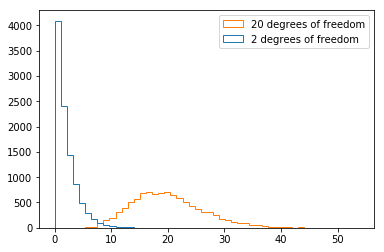

In [52]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','20 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

* Let's say that we have an expectation that when a new course is launched on a MOOC platform, the keenest students find out about it and all flock to it. Thus, we might expect that those students who sign up quite quickly after the course is launched with higher performance than those students who signed up after the MOOC has been around for a while. In this example, we have samples from two different groups which we want to compare. The early sign ups and the late sign ups.

In [3]:
df = pd.read_csv('grades.csv')

In [4]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [ ]:
len(df)

In [17]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [18]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [19]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [20]:
from scipy import stats
stats.ttest_ind?

In [22]:
# you can see no statistical significant difference between the two groups
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade']) 

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [23]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [24]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

* Be aware of P-hacking

# General 
* <a href="https://www.wired.com/2008/06/pb-theory/">The End of Theory: The Data Deluge Makes the Scientific Method Obsolete</a>
* Digital computers made information readable. The Internet made it reachable.
* Read `Think Stats` book.
